In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
df = pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

We don't have any null values in any feature.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

We have many features with two or three Categorical values. We would proceed with getting numeric values for them get_dummies function from pandas library.

In [8]:
Data = pd.get_dummies(df, columns = ['gender', 'Partner', 'Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn'], drop_first = True)

In [9]:
Data.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,0,34,56.95,1889.5,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,0,2,53.85,108.15,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
3,7795-CFOCW,0,45,42.30,1840.75,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,9237-HQITU,0,2,70.70,151.65,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1


In [10]:
Data.TotalCharges = pd.to_numeric(Data.TotalCharges, errors='coerce')

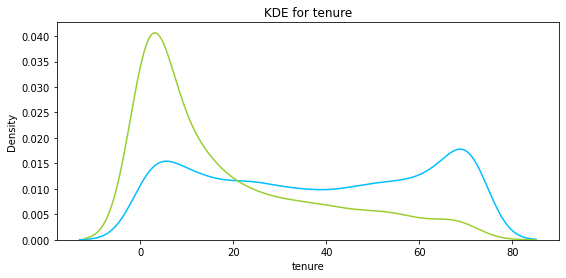

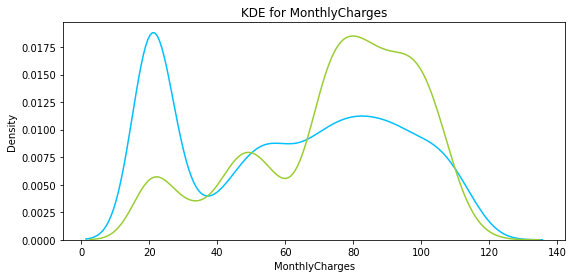

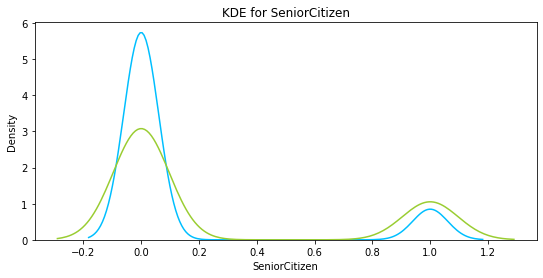

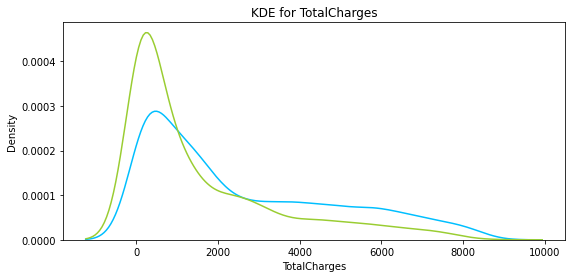

In [11]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(Data[Data['Churn_Yes'] == 0][feature].dropna(), color= 'deepskyblue', label= 'Churn: No')
    ax1 = sns.kdeplot(Data[Data['Churn_Yes'] == 1][feature].dropna(), color= 'yellowgreen', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('SeniorCitizen')
kdeplot('TotalCharges')


We have plot the KDE plots for the numeric features in the dataset. 
1) The Customer with less tenure have the maximum churn.
2) Customers with high Monthly Charges have the maximum churn.
3) Customers who are senior citizens have the minimum churn.
4) Customers with high Total Charges have the maximum churn.

We will first plot pie charts for Churn of Customer and Gender.

In [12]:
gender_labels = ['Male', 'Female']
chur_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=gender_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=chur_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

We can observe that only is only 0.5 percentage of differance between Gender ratio. It won't contribute much to the Churn.

In [13]:
D1 = Data[Data['gender_Male'] == 1]['Churn_Yes'].sum()
D2 = Data[Data['gender_Male'] == 0]['Churn_Yes'].sum()
print(D1)
print(D2)

930
939


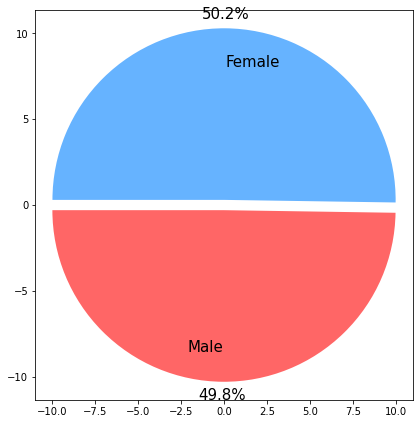

In [14]:
plt.figure(figsize=(6, 6))

plt.pie([930,939], labels=['Male', 'Female'],autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=['#ff6666', '#66b3ff'], startangle=180,frame=True, explode=(0.3,0.3),radius=10,textprops = {"fontsize":15}, counterclock = True, )
plt.tight_layout()
plt.show()

Our initial assumption is valided by the pie chart. There is only 0.4% differance between customer churn based on gender. 

In [15]:
P1 = Data[Data['Partner_Yes'] == 1]['Churn_Yes'].sum()
P2 = Data[Data['Partner_Yes'] == 0]['Churn_Yes'].sum()
print(P1)
print(P2)

669
1200


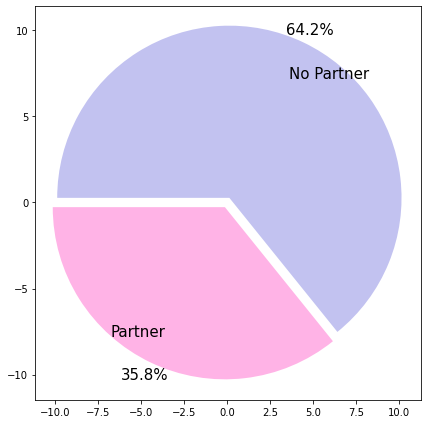

In [16]:
plt.figure(figsize=(6, 6))

plt.pie([669,1200], labels=['Partner', 'No Partner'],autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=['#ffb3e6', '#c2c2f0'], startangle=180,frame=True, explode=(0.3,0.3),radius=10,textprops = {"fontsize":15}, counterclock = True, )
plt.tight_layout()
plt.show()

35.8 percentage of the Customers who have parnters have continued the service while 64.2% has switched to other or discontinued.

In [17]:
C1 = Data[Data['Dependents_Yes'] == 1]['Churn_Yes'].sum()
C2 = Data[Data['Dependents_Yes'] == 0]['Churn_Yes'].sum()
print(C1)
print(C2)

326
1543


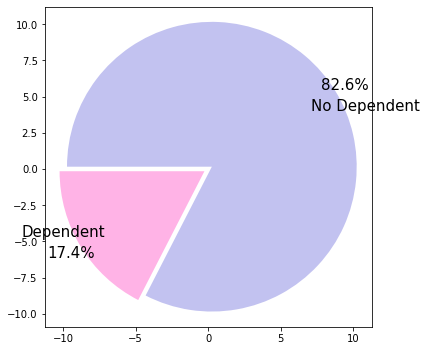

In [18]:
plt.figure(figsize=(6, 6))

plt.pie([326,1543], labels=['Dependent', 'No Dependent'],autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=['#ffb3e6', '#c2c2f0'], startangle=180,frame=True, explode=(0.3,0.3),radius=10,textprops = {"fontsize":15}, counterclock = True, )
plt.tight_layout()
plt.show()

17.4% of Customers who have dependent have switched or discontinued, while 82.6% customer whiout any dependent have switched or discontinued.

In [19]:
X = Data.drop(['Churn_Yes','customerID'], axis=1)
Y = Data['Churn_Yes']

In [20]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=20)


In [21]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = XGBClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:06:31] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 79.13%
_______________________________________________
Confusion Matrix: 
 [[1381  199]
 [ 242  291]]



Our model predicted 1381 customer correctly who churned and 199 customer incorrectly. It also predicted that 242 customer will not churn which is incorrect and 291 customer who will not churn correctly.